In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import os
from glob import glob

In [4]:
fl = glob('*')

In [9]:
names = fl[1:]

In [30]:
C1 = names[0];C2 = names[1];
usgs = names[-1]

In [31]:
c1 = pd.read_csv(C1,header=25,sep='\t')
c2 = pd.read_csv(C2,header=25,sep='\t')

In [39]:
ug = pd.read_csv(usgs,header=35,delim_whitespace=True)

In [41]:
ug.to_csv('usgs.csv')

In [42]:
c1.to_csv('Channel1.csv')
c2.to_csv('Channel2.csv')

In [198]:
f21 = glob('princeton_trt/channel 1/2019/sep/*00001.ddf')
f22 = glob('princeton_trt/channel 2/2019/sep/*00001.ddf')
f23 = glob('princeton_trt/channel 3/2019/sep/*00001.ddf')
f24 = glob('princeton_trt/channel 4/2019/sep/*00001.ddf')

In [200]:
f22

['princeton_trt/channel 2/2019/sep/channel 2 20190911 160911 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190911 122110 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190910 232911 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190911 000110 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190910 162111 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190911 230111 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190910 173311 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190911 221311 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190911 133310 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190911 010911 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190911 174511 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190911 225710 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 20190912 023310 00001.ddf',
 'princeton_trt/channel 2/2019/sep/channel 2 201909

In [205]:
all1 = pd.DataFrame(index=pd.read_csv(f21[1],header=25,sep='\t')['length (m)'].values)

for i in range(len(f21)):
    fram = pd.read_csv(f21[i],header=25,sep='\t')
    fram.set_axis(['depth','tempc','stokes','nonstokes'],axis=1,inplace=True)
    all1[str(f21[i])[-25:-25+8]+str(f21[i])[-25+9:-25+15]]=fram.tempc.values

In [211]:
all2 = pd.DataFrame(index=pd.read_csv(f22[1],header=25,sep='\t')['length (m)'].values)

for i in range(len(f22)):
    fram = pd.read_csv(f22[i],header=25,sep='\t')
    fram.set_axis(['depth','tempc','stokes','nonstokes'],axis=1,inplace=True)
    all2[str(f22[i])[-25:-25+8]+str(f22[i])[-25+9:-25+15]]=fram.tempc.values

In [212]:
all3 = pd.DataFrame(index=pd.read_csv(f23[1],header=25,sep='\t')['length (m)'].values)
for i in range(len(f23)):
    fram = pd.read_csv(f23[i],header=25,sep='\t')
    fram.set_axis(['depth','tempc','stokes','nonstokes'],axis=1,inplace=True)
    all3[str(f23[i])[-25:-25+8]+str(f23[i])[-25+9:-25+15]]=fram.tempc.values


In [213]:
all4 = pd.DataFrame(index=pd.read_csv(f23[1],header=25,sep='\t')['length (m)'].values)

for i in range(len(f24)):
    fram = pd.read_csv(f24[i],header=25,sep='\t')
    fram.set_axis(['depth','tempc','stokes','nonstokes'],axis=1,inplace=True)
    all4[str(f24[i])[-25:-25+8]+str(f24[i])[-25+9:-25+15]]=fram.tempc.values

In [234]:
p2[p2.columns[-1]]

0.556      28.125
1.571      24.753
2.586      23.849
3.600      23.085
4.615      16.478
5.629       6.189
6.644       2.045
7.659       1.637
8.673       1.444
9.688       1.376
10.702      1.763
11.717      7.926
12.731     18.257
13.746     23.896
14.761     24.955
15.775     25.003
16.790     24.817
17.804     24.673
18.819     24.916
19.834     24.985
20.848     25.068
21.863     25.079
22.877     24.962
23.892     24.839
24.907     25.045
25.921     25.025
26.936     24.930
27.950     24.909
28.965     24.769
29.980     24.903
            ...  
390.161    26.757
391.175    27.188
392.190    26.805
393.205    25.573
394.219    23.943
395.234    23.757
396.248    25.526
397.263    26.890
398.278    26.810
399.292    26.659
400.307    26.779
401.321    26.799
402.336    27.032
403.350    27.726
404.365    27.820
405.380    28.076
406.394    28.113
407.409    28.080
408.423    28.096
409.438    28.051
410.453    28.159
411.467    28.091
412.482    28.130
413.496    28.367
414.511   

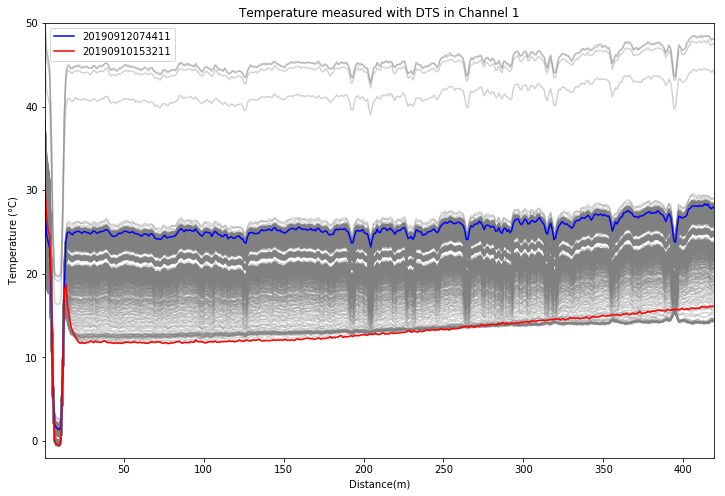

In [247]:
p1 = all1[all1.index > 0]
p2 = p1[p1.index < 420]
p2 = p2.reindex(sorted(p2.columns),axis=1)
plt.figure(figsize=(12,8))
p2.plot(legend=False,alpha=0.35,ax = plt.gca(),color = 'grey')
p2[p2.columns[-1]].plot(legend=True,color = 'blue',ax = plt.gca(),label=p2.columns[-1])
p2[p2.columns[0]].plot(legend=True,color = 'red',ax = plt.gca(),label=p2.columns[0])
plt.ylim(-2,50)
plt.xlabel('Distance(m)')
plt.ylabel('Temperature ($\degree$C)')
plt.title('Temperature measured with DTS in Channel 1')
plt.savefig('ch1.png',dpi=300)

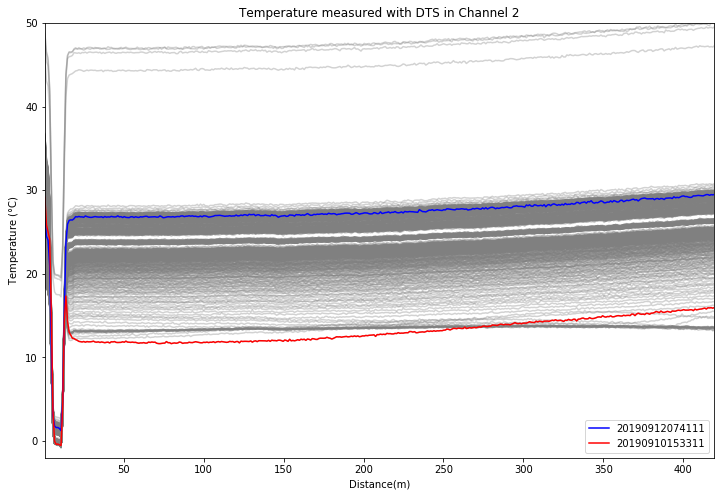

In [248]:
p21 = all2[all2.index > 0]
p22 = p21[p21.index < 420]
plt.figure(figsize=(12,8))
p22 = p22.reindex(sorted(p22.columns),axis=1)
p22.plot(legend=False,alpha=0.35,ax = plt.gca(),color = 'grey')
p22[p22.columns[-1]].plot(legend=True,color = 'blue',ax = plt.gca(),label=p22.columns[-1])
p22[p22.columns[0]].plot(legend=True,color = 'red',ax = plt.gca(),label=p22.columns[0])
plt.ylim(-2,50)
plt.xlabel('Distance(m)')
plt.ylabel('Temperature ($\degree$C)')
plt.title('Temperature measured with DTS in Channel 2')
plt.savefig('ch2.png',dpi=300)

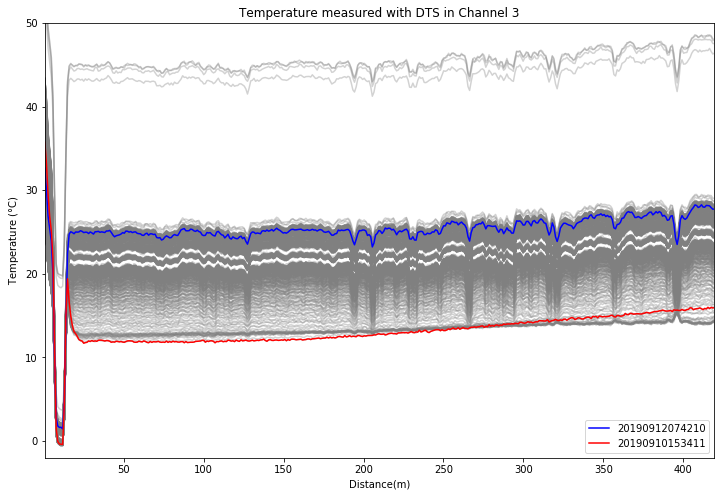

In [249]:
p31 = all3[all3.index > 0]
p23 = p31[p31.index < 420]
plt.figure(figsize=(12,8))
p23 = p23.reindex(sorted(p23.columns),axis=1)
p23.plot(legend=False,alpha=0.35,ax = plt.gca(),color = 'grey')
p23[p23.columns[-1]].plot(legend=True,color = 'blue',ax = plt.gca(),label=p23.columns[-1])
p23[p23.columns[0]].plot(legend=True,color = 'red',ax = plt.gca(),label=p23.columns[0])
plt.ylim(-2,50)
plt.xlabel('Distance(m)')
plt.ylabel('Temperature ($\degree$C)')
plt.title('Temperature measured with DTS in Channel 3')
plt.savefig('ch3.png',dpi=300)

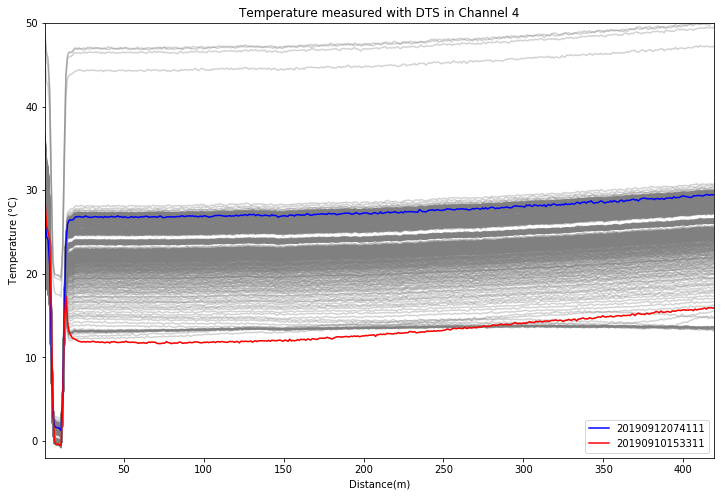

In [250]:
p41 = all2[all2.index > 0]
p24 = p41[p41.index < 420]
p24 = p24.reindex(sorted(p24.columns),axis=1)
plt.figure(figsize=(12,8))
p24.plot(legend=False,alpha=0.35,ax = plt.gca(),color = 'grey')
p24[p24.columns[-1]].plot(legend=True,color = 'blue',ax = plt.gca(),label=p24.columns[-1])
p24[p24.columns[0]].plot(legend=True,color = 'red',ax = plt.gca(),label=p24.columns[0])
plt.ylim(-2,50)
plt.xlabel('Distance(m)')
plt.ylabel('Temperature ($\degree$C)')
plt.title('Temperature measured with DTS in Channel 4')
plt.savefig('ch4.png',dpi=300)

In [102]:
pd.read_csv(f22[0],header=25,sep='\t')

,length (m),temperature (�C),Stokes,anti-Stokes
0,-747.200,-200.000,0.023,-0.251
1,-746.185,-200.000,0.030,0.186
2,-745.171,-200.000,-0.016,0.336
3,-744.156,-88.774,0.099,-0.030
4,-743.142,-48.149,-0.196,0.097
5,-742.127,-11.467,0.167,0.112
6,-741.112,-71.946,-0.154,-0.059
7,-740.098,-52.990,-0.324,-0.153
8,-739.083,-200.000,-0.009,-0.073
9,-738.069,323.876,0.130,0.254


In [251]:
p2.to_csv('c1.csv')
p22.to_csv('c2.csv')
p23.to_csv('c3.csv')
p24.to_csv('c4.csv')

In [5]:
fl

['ch3.png',
 'c3.csv',
 'c4_data_sofar.csv',
 'c2.csv',
 'ch2.png',
 'c3_data_sofar.csv',
 'c1.csv',
 'ch1.png',
 'c2_data_sofar.csv',
 'c4.csv',
 'ch4.png',
 'channel 1 20190910 142117 00001.ddf',
 'princeton_trt',
 'channel 2 20190910 142132 00001.ddf',
 'c1_data_sofar.csv',
 'usgs.csv',
 'Channel1.csv',
 'Channel2.csv',
 'GEO-TEST1.las',
 'pt0919',
 'geo_anascript.ipynb',
 'bulkprocess.py',
 'pt0920',
 'bulkprocess.pyc']

In [82]:
pd.read_excel('gtri_raw.xlsx',index_col=0,skiprows=3).columns

Index([u'(hr)', u'Supply1', u'Supply2', u'Return1', u'Return2', u'(W)',
       u'(W).1', u'(gpm)', u'(Btu/hr-ft)'],
      dtype='object')

In [17]:
xls = pd.read_excel('gtri_raw.xlsx',index_col=0,skiprows=3)

In [21]:
xls.columns[-1]

'(Btu/hr-ft)'

In [24]:
xls = xls.rename(columns={xls.columns[-1]:'HeatIn'})

In [54]:
xls = xls[xls['(hr)']>0]

In [55]:
xls.head()

,(hr),Supply1,Supply2,Return1,Return2,(W),(W).1,(gpm),HeatIn
Date/Time (EDT),,,,,,,,,
2019-09-10 17:45:00,0.069444,69.42757,69.41255,58.97733,58.88565,17862.338211,8194.569855,19.65160,66.367334
2019-09-10 17:50:00,0.152778,70.54902,70.56402,59.99318,59.90161,17990.413980,12865.480940,19.48046,78.590425
2019-09-10 17:55:00,0.236111,71.41438,71.41438,60.84826,60.75678,17981.848578,12863.735025,19.48505,78.564162
2019-09-10 18:00:00,0.319444,72.01358,72.02856,61.45087,61.32896,17967.517250,12855.880315,19.49422,78.507654
2019-09-10 18:05:00,0.402778,72.42641,72.42641,61.89468,61.77284,17956.352735,12851.813203,19.52633,78.468858


In [131]:
gtri = xls[['Supply1','Return1','HeatIn','(hr)']].copy()

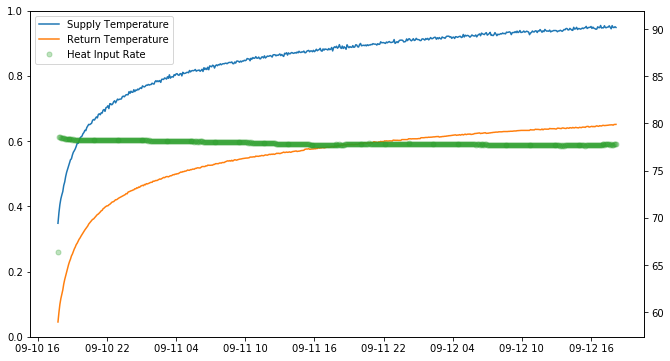

In [69]:
fig,ax = plt.subplots(figsize=(11,6))
ax2= ax.twinx()
ax = plt.plot(gtri.Supply1,label='Supply Temperature')
ax = plt.plot(gtri.Return1,label='Return Temperature')

ax2 = plt.plot(gtri.HeatIn,label='Heat Input Rate',marker = 'o',linestyle=' ',alpha=0.3,markersize = 5)
plt.legend()
# gtri['Supply1']

In [70]:
gtri

,Supply1,Return1,HeatIn,(hr)
Date/Time (EDT),,,,
2019-09-10 17:45:00,69.42757,58.97733,66.367334,0.069444
2019-09-10 17:50:00,70.54902,59.99318,78.590425,0.152778
2019-09-10 17:55:00,71.41438,60.84826,78.564162,0.236111
2019-09-10 18:00:00,72.01358,61.45087,78.507654,0.319444
2019-09-10 18:05:00,72.42641,61.89468,78.468858,0.402778
2019-09-10 18:10:00,72.77924,62.35779,78.446227,0.486111
2019-09-10 18:15:00,73.43095,62.98989,78.430222,0.569444
2019-09-10 18:20:00,73.79839,63.46770,78.399744,0.652778
2019-09-10 18:25:00,74.37476,63.86308,78.352498,0.736111


In [67]:
import numpy as np

In [71]:
yinterp = np.interp(gtri['(hr)'],gtri['(hr)'],gtri['HeatIn'])

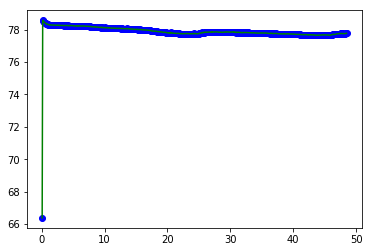

In [72]:
plt.plot(gtri['(hr)'],gtri['HeatIn'],'bo')
plt.plot(gtri['(hr)'],yinterp,'g-')

In [73]:
yinterp

array([66.36733375, 78.5904249 , 78.56416182, 78.50765365, 78.46885847,
       78.44622726, 78.43022208, 78.39974407, 78.35249784, 78.37455258,
       78.35193722, 78.33919523, 78.3236151 , 78.30762405, 78.31468864,
       78.29389398, 78.30497874, 78.29801517, 78.29156486, 78.29104282,
       78.2875163 , 78.29028209, 78.29708126, 78.29682096, 78.28616949,
       78.28719807, 78.27915007, 78.27390434, 78.2946021 , 78.27758979,
       78.28175373, 78.27218171, 78.2847034 , 78.26801838, 78.27507908,
       78.2681115 , 78.27504267, 78.26824987, 78.27190299, 78.27014007,
       78.26625626, 78.26312614, 78.26874487, 78.26459727, 78.26945323,
       78.2719021 , 78.26790438, 78.26459159, 78.26173968, 78.25803025,
       78.26692049, 78.25149974, 78.26087925, 78.26428511, 78.25808027,
       78.26207499, 78.26294436, 78.25939317, 78.25913347, 78.25519781,
       78.25261447, 78.25036898, 78.24527476, 78.24419003, 78.23125757,
       78.24130422, 78.23471463, 78.24709185, 78.22063931, 78.24

In [132]:
gtri['mean']=0.5*(gtri['Supply1']+gtri['Return1'])

In [133]:
gradi = np.gradient(gtri['mean'],np.log(gtri['(hr)']))

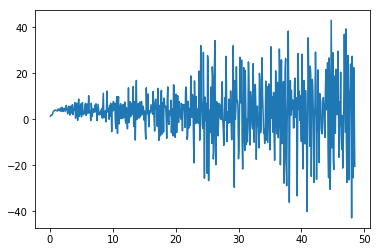

In [134]:
plt.plot(gtri['(hr)'],gradi)

In [135]:
np.mean(gradi)

3.388974764210885

In [136]:
gtri['m'] = gradi

In [137]:
gtri.head()

,Supply1,Return1,HeatIn,(hr),mean,m
Date/Time (EDT),,,,,,
2019-09-10 17:45:00,69.42757,58.97733,66.367334,0.069444,64.202450,1.355368
2019-09-10 17:50:00,70.54902,59.99318,78.590425,0.152778,65.271100,1.755277
2019-09-10 17:55:00,71.41438,60.84826,78.564162,0.236111,66.131320,1.983054
2019-09-10 18:00:00,72.01358,61.45087,78.507654,0.319444,66.732225,1.908600
2019-09-10 18:05:00,72.42641,61.89468,78.468858,0.402778,67.160545,2.025378


In [139]:
gtriL10 = gtri[gtri['(hr)']>=10]

In [176]:
np.mean(gtriL10.m)

3.2607333016006814

In [141]:
gtri['ks']=gtri['HeatIn']/4/np.pi/gtri['m']

In [143]:
gtri['mean'].mean()

81.63802594501726

In [144]:
mm = 3.34
qq = 77.9
gtri_ks = qq/np.pi/4/mm
#This is the resulting thermal conductivity from the analysis of GTRI, in Btu/hr/ft/˚F, 1.856 Btu/hr-ft-˚F

In [147]:
#The corresponding thermal diffusivity with known c_p and borehole resistance:
gtri_as = gtri_ks/37.5*24 #Into ft2/day, 1.1878

In [177]:
gtri_rb = 1.0/4/np.pi/gtri_ks*((gtriL10['mean'].mean()-58.4)/3.34 - np.log(4*gtri_as/24*48.5/(0.083*6.5)**2))

In [178]:
gtri_rb

0.1675182541138529

In [180]:
#Test for fit time range:
5/(gtri_as/24/(0.083*6.5)**2)

29.40377177914995

In [153]:
1.0/4/np.pi/gtri_ks

0.04287548138639281

Points to note with the Gehlin 
1. The heat input rate is somehow calculated from P1, P2 and Length, which is already Q/L. The late time slope is the slope of the linear regression of ANY temperature with LOG TIME in HOURS.
2. The existing setup of the DTS/exchanger would not be a HUGE deal only if we're actually dealing with the ongoing effort of undermining this. Absolutely not a huge issue if we were to go forward...?